<big><big>Using housing data which includes sold price as well as features about the house, I want to look at property features which have strong correlation to sale price to gain an understanding of what contributes most to the value.

Using the pearsonr function in the scipy.stats package we can get the p-value which can be used in hypothesis testing determining if the relationships between variables are statistically significant.

In [17]:
# Import needed packages
import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the data
# Data source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
df = pd.read_csv('/Users/TT/Desktop/7 Stats/housing.csv')

# Set to see all columns in output
pd.set_option('display.max_columns', None)

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.shape

(1460, 81)

In [20]:
# Checking for null values

df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [21]:
# Percent of values which are null by column

((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [22]:
# Dropping columns with nulls
df = df.dropna(axis=1)

In [23]:
# The dataset to be used to calculate correlation:

df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
# Checking how many rows, columns
df.shape

(1460, 62)

In [33]:
# Making a correlation matrix 
corr_matrix = df.corr()
corr_matrix

(35, 35)

<AxesSubplot:>

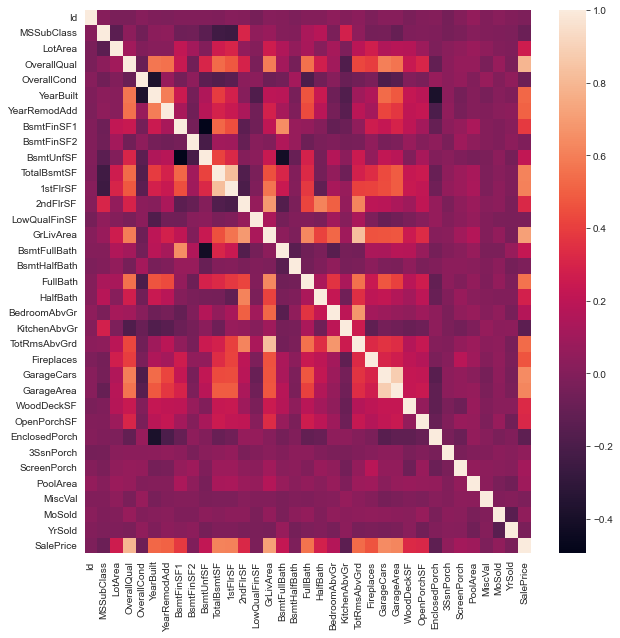

In [34]:
# Visualizing the correlation matrix
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,10

sns.set_style('whitegrid')
sns.heatmap(data=corr_matrix)

In [10]:
# Getting pairs with correlation coefficients above 0.5 (Absolute value)
# Code source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandasns

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened
corrlist = corrFilter(df, .5)

In [11]:
# Setting the pairs list to a dataframe so I can query on it as I am only interested in relationship to Sale Price
type(corrlist)
corrlist = pd.DataFrame(corrlist)
corrlist = corrlist.reset_index()
corrlist.columns=['variable1', 'variable2', 'r']

In [15]:
# Getting all variable pairs with SalePrice as a variable as that is the dependent variable of interest
# Ordering descending starting with highet correlation
corrlist.query('variable1 == "SalePrice" or variable2 == "SalePrice"').sort_values(by='r', ascending=False)

,variable1,variable2,r
29,SalePrice,OverallQual,0.790982
28,GrLivArea,SalePrice,0.708624
24,SalePrice,GarageCars,0.640409
22,GarageArea,SalePrice,0.623431
20,SalePrice,TotalBsmtSF,0.613581
18,SalePrice,1stFlrSF,0.605852
11,SalePrice,FullBath,0.560664
5,SalePrice,TotRmsAbvGrd,0.533723
4,SalePrice,YearBuilt,0.522897
1,SalePrice,YearRemodAdd,0.507101


<big><big>What are the top 3 continuous variables which could predict a sale price? I will just be looking at continous variables which could be used as predictors.

<big>1. GrLivArea = Above grade (ground) living area square feet

Text(0.5, 0, 'Square Feet')

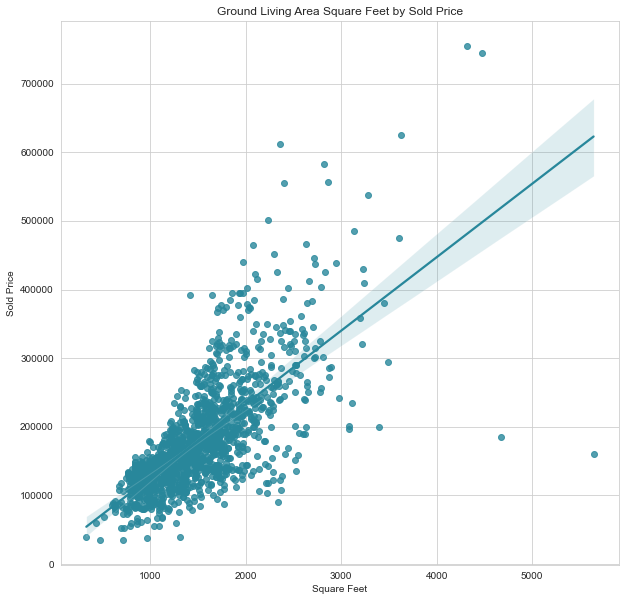

In [44]:
# Visualizing the relationship
sns.regplot(data=df, x='GrLivArea', y='SalePrice', color="#28879B")
plt.title('Ground Living Area Square Feet by Sold Price')
plt.ylabel('Sold Price')
plt.xlabel('Square Feet')

In [45]:
# H0 (null hypothesis): There is no statistically significant relationship between Ground floor square feet and Sale Price
# H1 (alternative hypothesis): There is a statistically significant relationship between Ground floor square feet and Sale Price
# Level of significance is 0.05, confidence level 0.95

X = df['GrLivArea'].array # Ground floor square foorage
Y = df['SalePrice'].array # Sale price
result = pearsonr(X,Y)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)
# (0.7086244776126513, 4.518033646787136e-223)

# Fail to reject the null hypothesis, accept alternative hypothesis

(0.7086244776126513, 4.518033646787136e-223)


<big>2. GarageArea = Size of garage in square feet

Text(0.5, 0, 'Garage Square Feet')

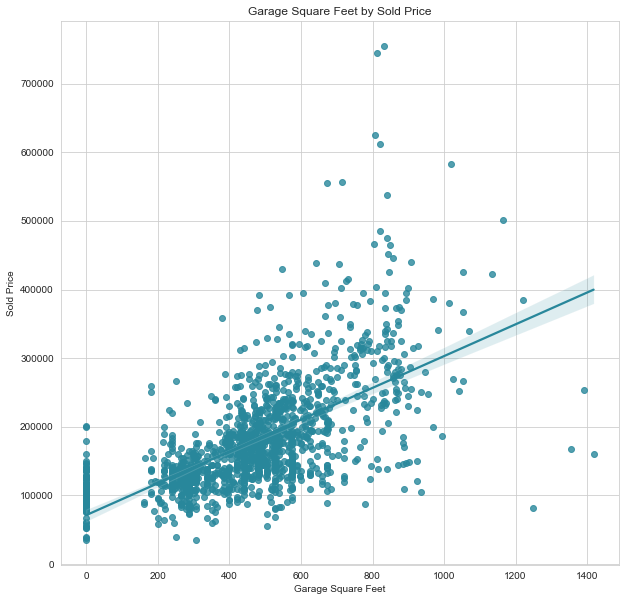

In [48]:
# Visualizing the relationship
sns.regplot(data=df, x='GarageArea', y='SalePrice', color="#28879B")
plt.title('Garage Square Feet by Sold Price')
plt.ylabel('Sold Price')
plt.xlabel('Garage Square Feet')

# Note: where Garage square feet = 0, prices never exceeded $200,000
# It appears having a garage at all can increase home value

In [49]:
# H0 (null hypothesis): There is no statistically significant relationship between Garage square feet and Sale Price
# H1 (alternative hypothesis): There is a statistically significant relationship between Garage square feet and Sale Price
# Level of significance is 0.05, confidence level 0.95

X2 = df['GarageArea'].array # Garage square feet(area)
Y2 = df['SalePrice'].array # Sale price
result = pearsonr(X2,Y2)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)
# (0.6234314389183613, 5.265038167981996e-158)

# Fail to reject the null hypothesis, accept alternative hypothesis

(0.6234314389183613, 5.265038167981996e-158)


<big>3. TotalBsmtSF = Total square feet of basement area

Text(0.5, 0, 'Basement Square Feet')

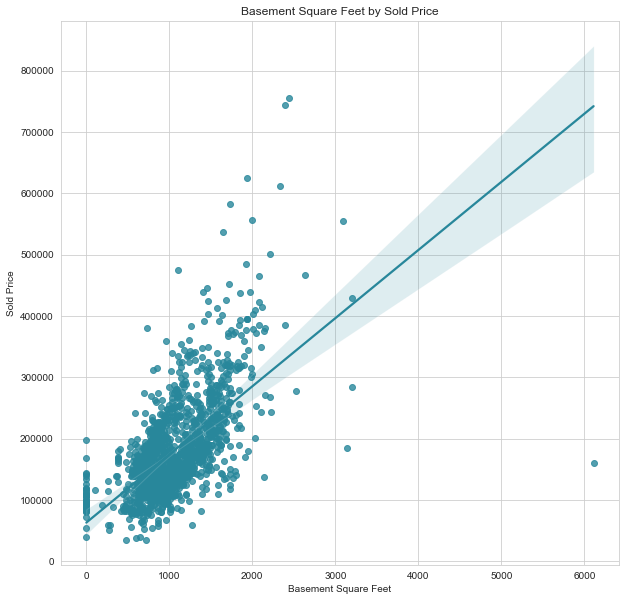

In [52]:
# Visualizing the relationship
sns.regplot(data=df, x='TotalBsmtSF', y='SalePrice', color="#28879B")
plt.title('Basement Square Feet by Sold Price')
plt.ylabel('Sold Price')
plt.xlabel('Basement Square Feet')

# Note: where Basement square feet = 0, prices are lower, sold price never exceeded $200,000
# It appears having a basement at all can increase home value

In [53]:
# H0 (null hypothesis): There is no statistically significant relationship between Basement square feet and Sale Price
# H1 (alternative hypothesis): There is a statistically significant relationship between Basement square feet and Sale Price
# Level of significance is 0.05, confidence level 0.95

X3 = df['TotalBsmtSF'].array # Basement square feet(area)
Y3 = df['SalePrice'].array # Sale price
result = pearsonr(X3,Y3)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)
# (0.6135805515591952, 9.484229391508992e-152)

# Fail to reject the null hypothesis, accept alternative hypothesis

(0.6135805515591952, 9.484229391508992e-152)


<big><b>Conclusion:</b> The top 3 continuous variables which could be used as predictors for a home's sold price are all related to square footage of the home.<p>
    1. Ground floor square feet<br>
    2. Garage square feet<br>
    3. Basement square feet<br>
All 3 predictors have statistically significant relationships as demonstrated with the p-value. <p>
    Next step: Machine Learning?